K-means clustering algorithm to group customers of a retail store based on their purchase history.

Importing Librarries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
%matplotlib inline


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Exploring 

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mask = df['Spending Score (1-100)'] >50
df_score = df[mask]
df_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [6]:
df_score.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


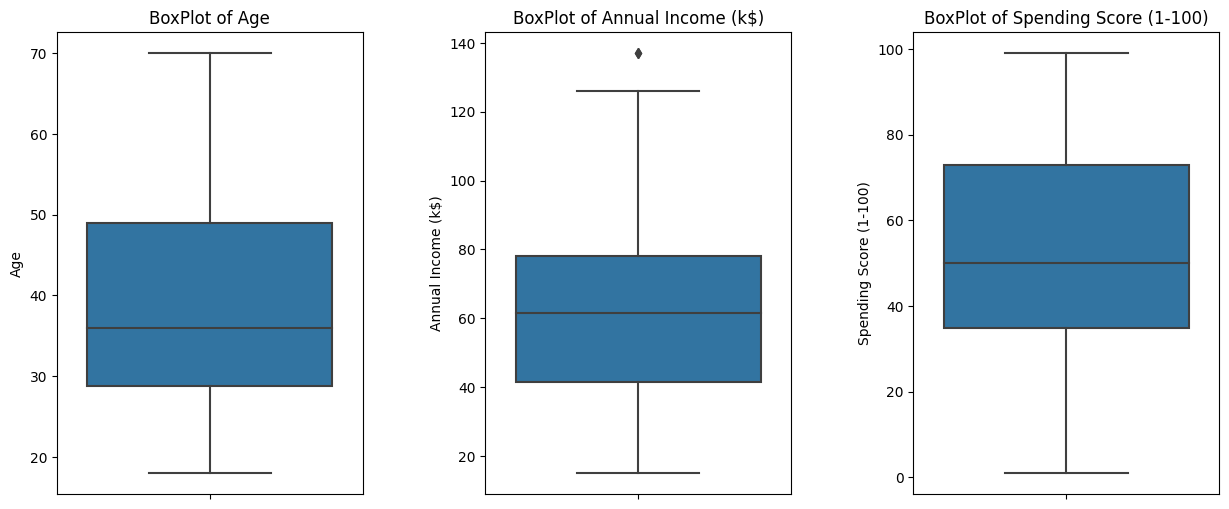

In [8]:

plt.figure(figsize=(15,6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)  # Change the layout to 1 row and 3 columns
    plt.subplots_adjust(hspace=0.2, wspace=0.4)
    sns.boxplot(y=df[x])
    plt.title('BoxPlot of {}'.format(x))
plt.show()

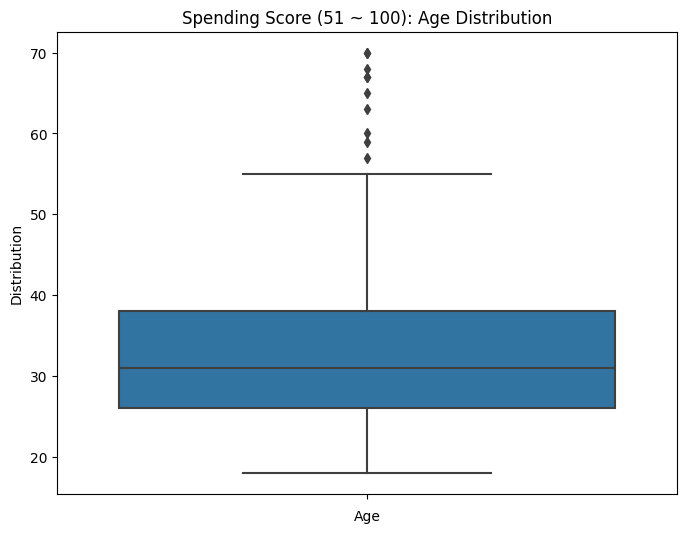

In [9]:
filtered_df = df[(df['Spending Score (1-100)'] >= 51) & (df['Spending Score (1-100)'] <= 100)]

plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df['Age'])
plt.xlabel('Age')
plt.title('Spending Score (51 ~ 100): Age Distribution')
plt.ylabel('Distribution')
plt.show()

Count Plot of Gender

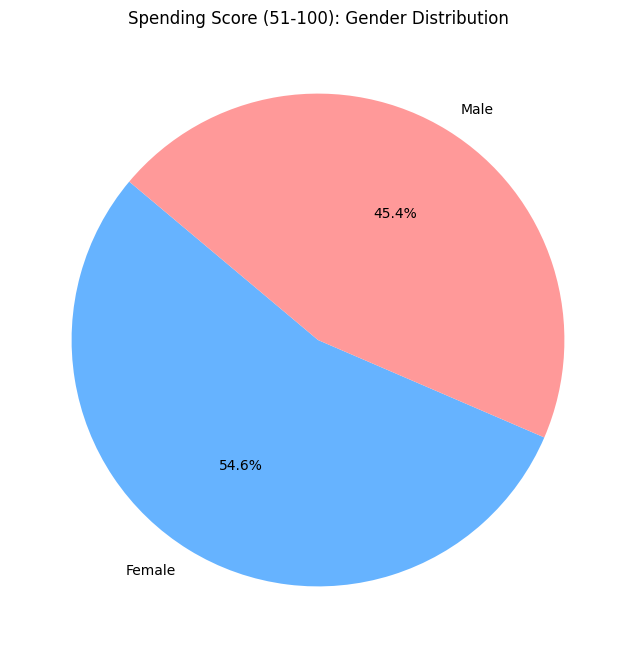

In [10]:

filtered_df = df_score[(df_score['Spending Score (1-100)'] >= 51) & (df_score['Spending Score (1-100)'] <= 100)]


gender_counts = filtered_df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Spending Score (51-100): Gender Distribution')
plt.show()

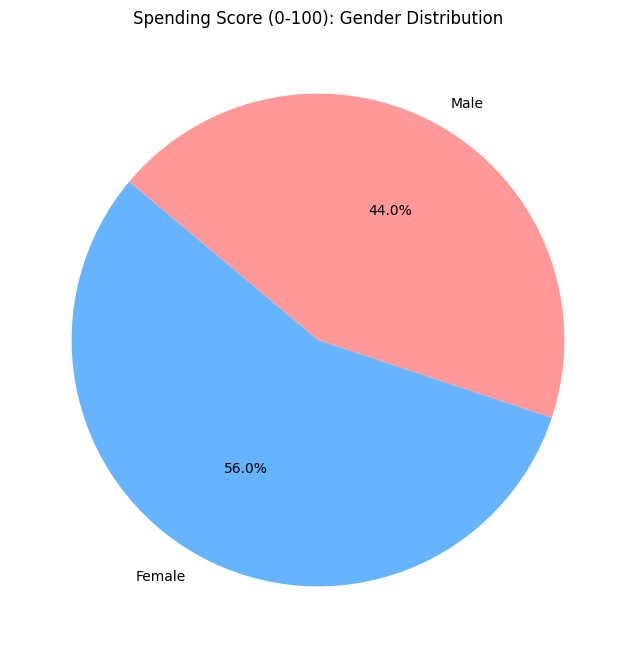

In [12]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Spending Score (0-100): Gender Distribution')
plt.show()

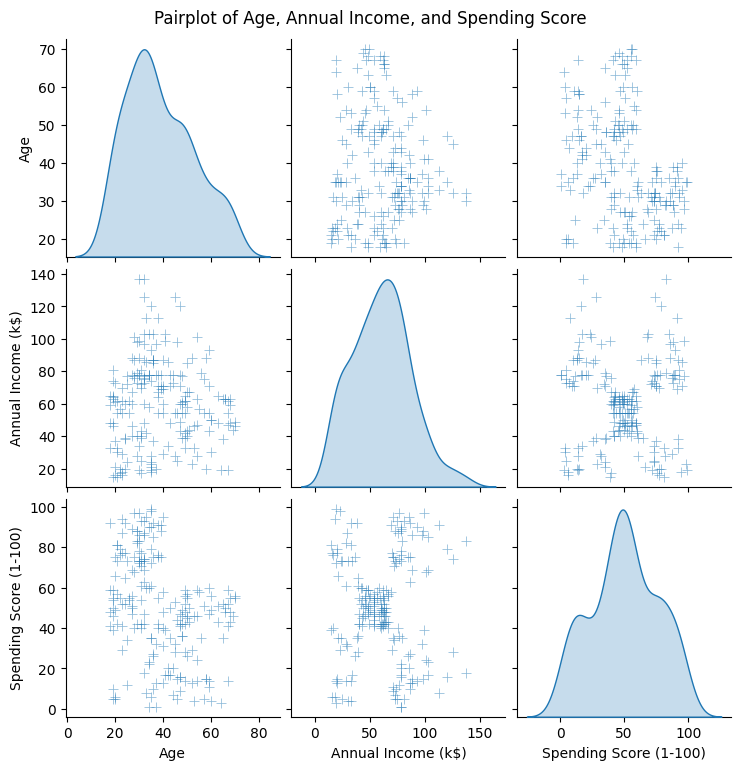

In [16]:
warnings.filterwarnings("ignore", category=UserWarning)

# Create a pairplot with scatter plots
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], kind='scatter', diag_kind='kde', markers='+', plot_kws={'alpha':0.5, 's':50})
plt.suptitle('Pairplot of Age, Annual Income, and Spending Score', y=1.02)
plt.show()

Distribution of values in Age , Annual Income and Spending Score according to Gende

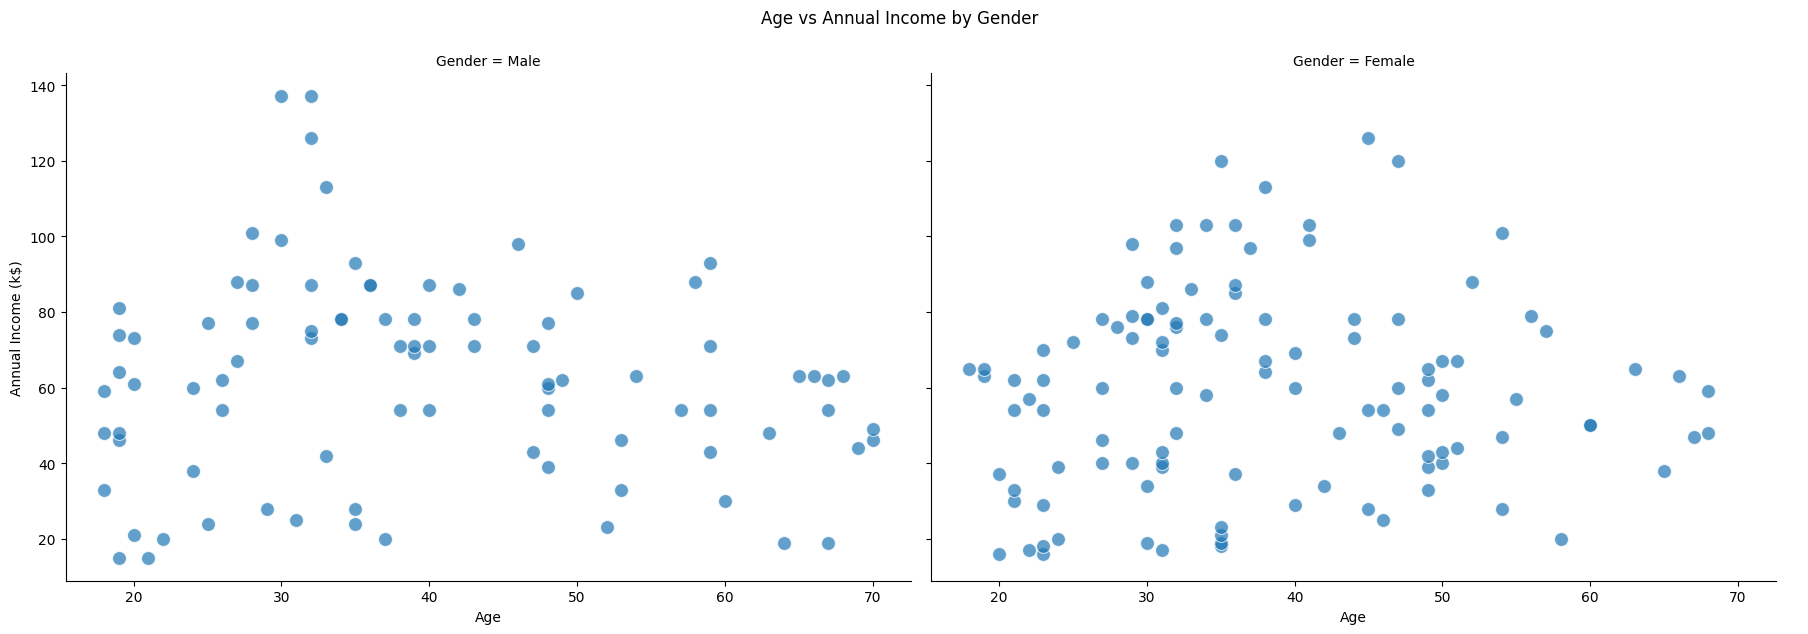

In [18]:
g = sns.FacetGrid(df, col='Gender', height=6, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='Age', y='Annual Income (k$)', alpha=0.7, s=100)

# Set the axis labels and title
g.set_axis_labels('Age', 'Annual Income (k$)')
g.fig.suptitle('Age vs Annual Income by Gender', y=1.05)

# Adjust layout
g.add_legend()
plt.show()

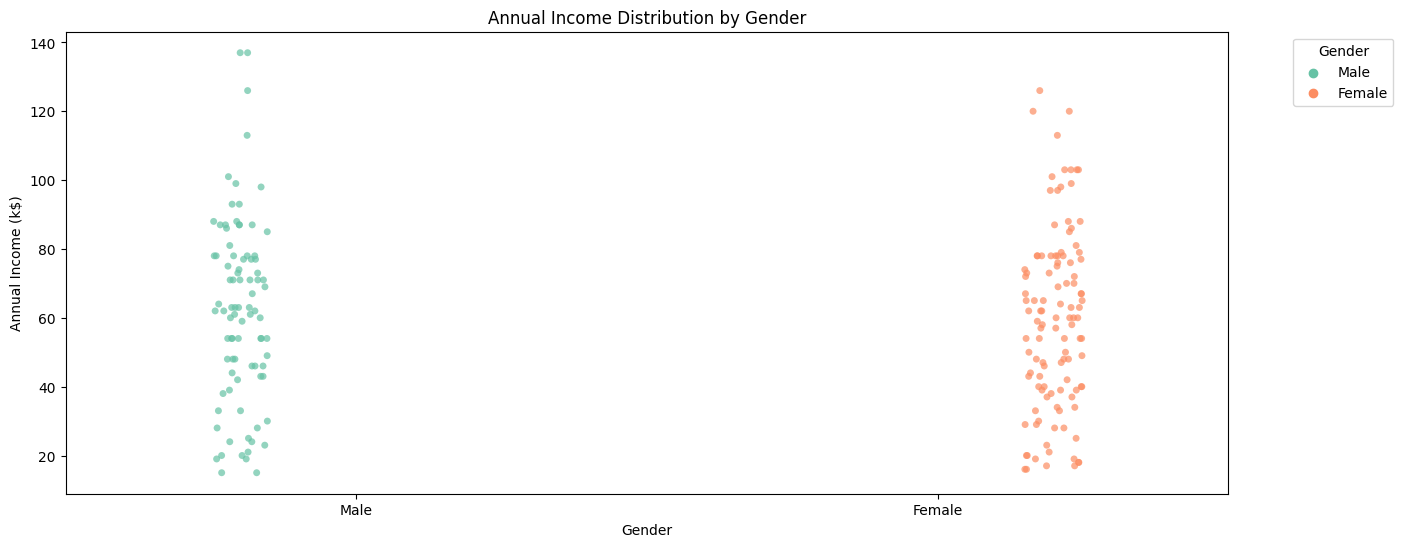

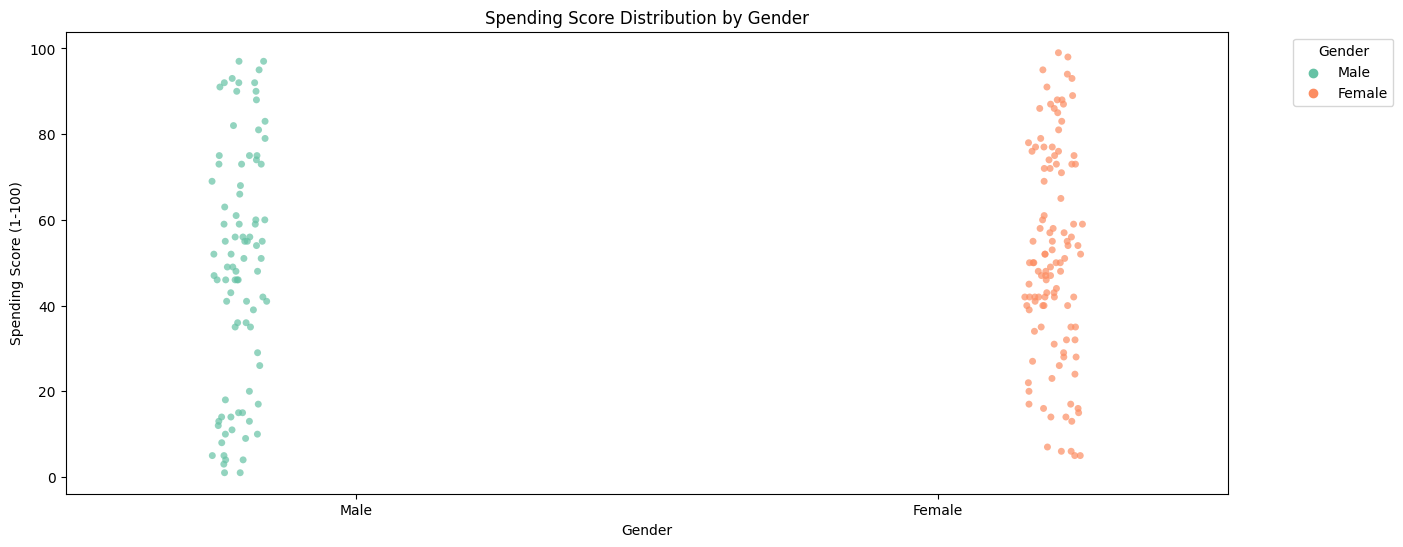

In [19]:
plt.figure(figsize=(15, 6))
sns.stripplot(x='Gender', y='Annual Income (k$)', hue='Gender', data=df, dodge=True, jitter=True, alpha=0.7, palette='Set2')
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(15, 6))
sns.stripplot(x='Gender', y='Spending Score (1-100)', hue='Gender', data=df, dodge=True, jitter=True, alpha=0.7, palette='Set2')
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

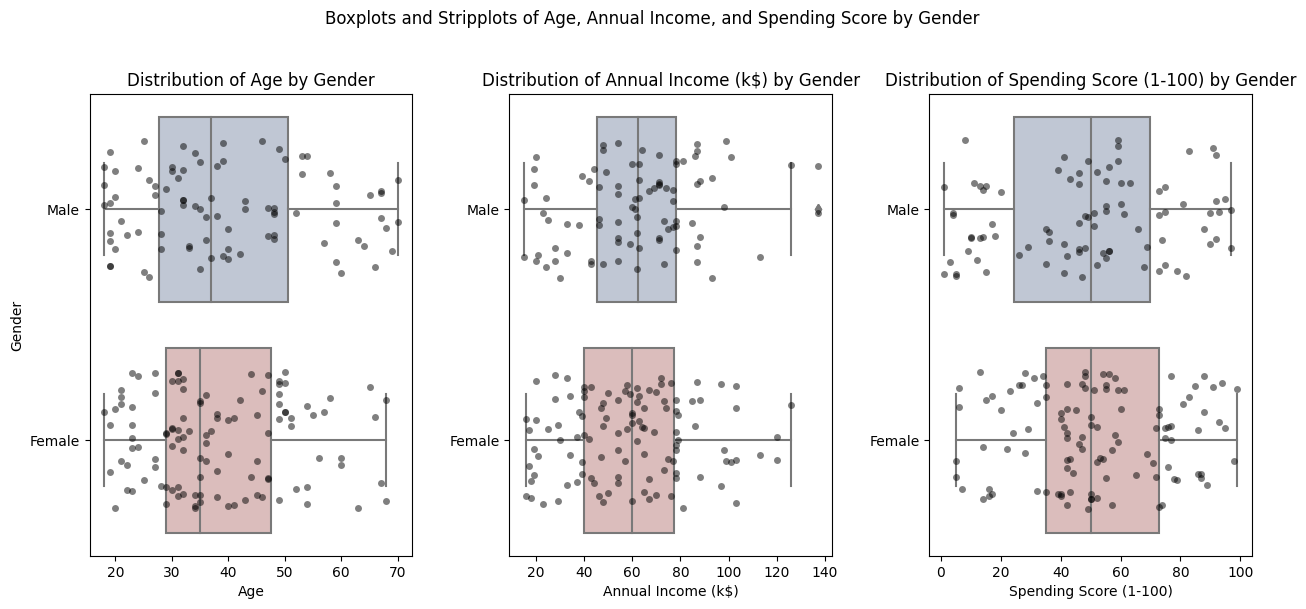

In [23]:
plt.figure(figsize=(15, 6))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    sns.boxplot(x=cols, y='Gender', data=df, palette='vlag')
    sns.stripplot(x=cols, y='Gender', data=df, color='black', alpha=0.5, jitter=0.3)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title(f'Distribution of {cols} by Gender')

plt.suptitle('Boxplots and Stripplots of Age, Annual Income, and Spending Score by Gender', y=1.02)
plt.show()

split

In [24]:
X = df.iloc[:,[3,4]]
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Making Clustering using K-Means

In [25]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
#Add a for loop to train model and calculate inertia,silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters = k,random_state=42,n_init=10)
    #Train Model
    model.fit(X)
    #Calculate Inertia
    inertia_errors.append(model.inertia_)
    #Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(X,model.labels_))
print("Inertia:",inertia_errors[:3])
print()
print("Silhouette Scores:",silhouette_scores[:3])

Inertia: [181363.59595959596, 106348.37306211119, 73679.78903948834]

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


plot

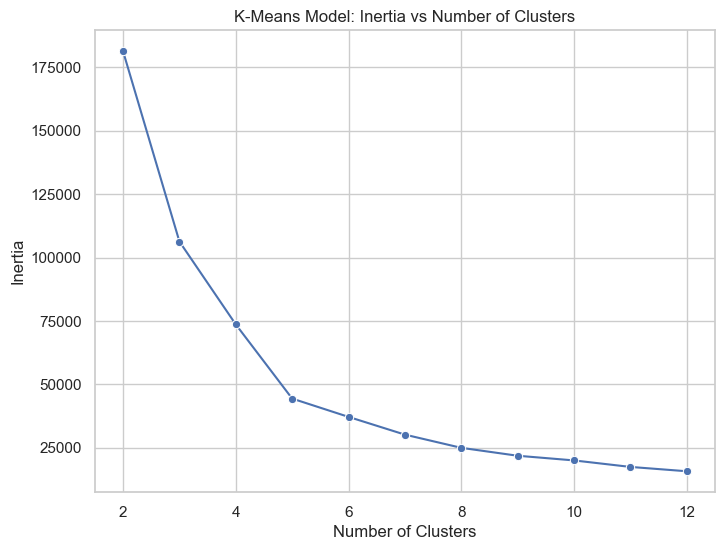

In [26]:
x_values = list(range(2, 13))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set Seaborn style

# Create a line plot using Seaborn
sns.lineplot(x=x_values, y=inertia_errors, marker='o', color='b')

# Add labels and title
plt.title('K-Means Model: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Show plot
plt.show()

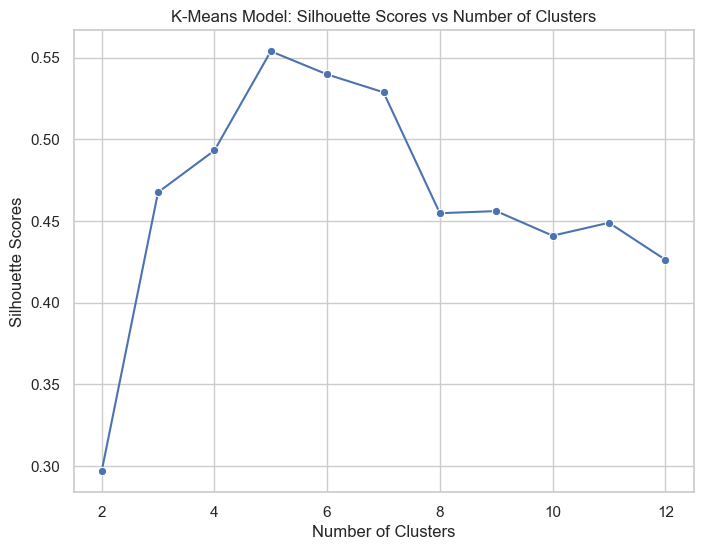

In [27]:
x_values = list(range(2, 13))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set Seaborn style

# Create a line plot using Seaborn
sns.lineplot(x=x_values, y=silhouette_scores, marker='o', color='b')

# Add labels and title
plt.title('K-Means Model: Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')

# Show plot
plt.show()

The Best 5 

In [28]:
final_model = KMeans(n_clusters=5,random_state=42,n_init=10)
final_model.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [29]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])
print(centroids[:5])

[4 2 4 2 4]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 81 and the vector passed to `x` has length 5.

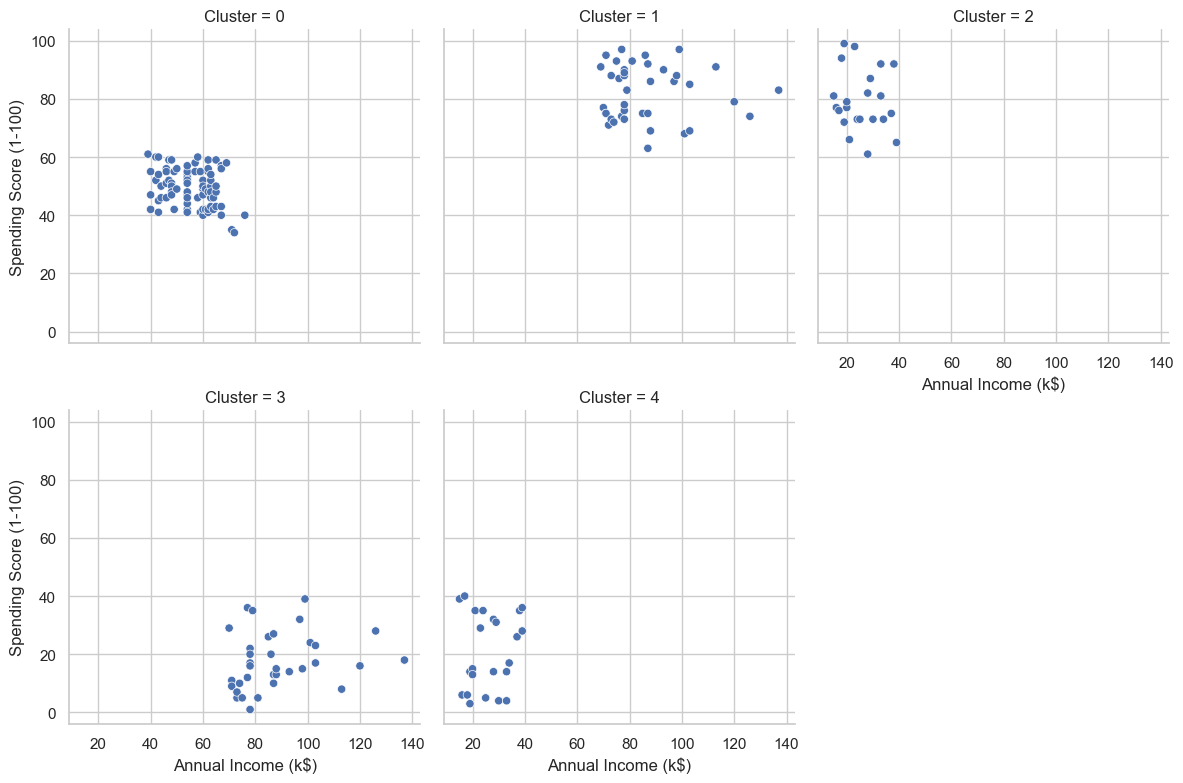

In [30]:
labels = final_model.labels_
centroids = final_model.cluster_centers_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Create a FacetGrid to plot each cluster separately
g = sns.FacetGrid(df, col="Cluster", col_wrap=3, height=4, palette='deep')
g.map_dataframe(sns.scatterplot, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='deep', legend=False)
g.map_dataframe(sns.scatterplot, x=centroids[:, 0], y=centroids[:, 1], color='black', marker='+', s=200)

# Add titles and labels
g.set_titles(col_template="Cluster {col_name}")
g.set_axis_labels("Annual Income (k$)", "Spending Score (1-100)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Annual Income vs Spending Score by Cluster", fontsize=16)
plt.show()

In [31]:
xgb = X.groupby(final_model.labels_).mean()

In [32]:
xgb

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


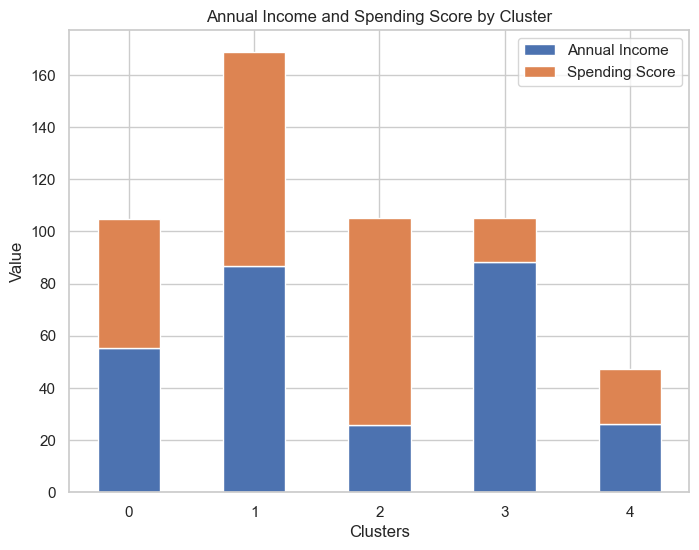

In [33]:
plt.figure(figsize=(8, 6))

# Define the cluster labels
clusters = [0, 1, 2, 3, 4]
x_labels = labels
income_values = xgb['Annual Income (k$)']
spending_values = xgb['Spending Score (1-100)']

# Create a stacked bar plot using Matplotlib
bar_width = 0.5
index = range(len(clusters))

# Plot Annual Income
plt.bar(index, income_values, bar_width, label='Annual Income')

# Plot Spending Score on top of Annual Income
plt.bar(index, spending_values, bar_width, bottom=income_values, label='Spending Score')

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.title('Annual Income and Spending Score by Cluster')
plt.xticks(index, clusters)
plt.legend()

# Show plot
plt.show()